# Metin Sınıflandırma

In [1]:
import pandas as pd
import on_islem
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("metin_siniflandirma.csv", index_col=0)
df["Text_2"]=df["Text"].apply(on_islem.pre_processing)
df["Text_2"]=df["Text_2"].apply(on_islem.remove_space)
df["Text_3"] = [' '.join(w for w in item) for item in df["Text_2"]]
df_index = df[df["Text_2"].str[0].isnull()].index
df=df.drop(df_index)
df=df.reset_index()
del df["index"]

df.head()

,Text,Label,Text_2,Text_3
0,Allah'ım çıldıracağım. Yemin ederim çıldıracağ...,kızgın,"[allah, çıldıracağım, ye, eder, çıldıracak, si...",allah çıldıracağım ye eder çıldıracak sinirimd...
1,site ne zaman çalıştıda ürün stokları bitti di...,kızgın,"[si, zama, çalıştı, ür, stok, bit, diyor, mal,...",si zama çalıştı ür stok bit diyor mal oğl kand...
2,Sebebi neydi ki diye bağıracağım şimdi az kaldı,kızgın,"[sebep, di, bağıracak, kal]",sebep di bağıracak kal
3,Black friday ne amk bu yıl çıkardınız bu bokud...,kızgın,"[black, friday, amk, yıl, çıkar, boku, mal, ne...",black friday amk yıl çıkar boku mal nesiniz
4,kısa kısa cevaplar vericeksen niye yazıyorsun ...,kızgın,"[kıs, kıs, cevap, vericek, ni, yazıyor, gerize...",kıs kıs cevap vericek ni yazıyor gerizekal


In [3]:
df.groupby("Label").size()

Label
korku      800
kızgın     799
mutlu      800
surpriz    800
üzgün      799
dtype: int64

In [4]:
msg_train, msg_test, label_train, label_test = train_test_split(df["Text_3"].tolist(), df["Label"].tolist(),test_size=0.2,random_state=42)
# burada veri setini %20 ye 80 olarak bölüyor. eğitimde %80lik kısım kullanılacak kalan %20 ise test. random state bölünme değeri. farklı girilirse farklı sonuç olur.

In [5]:
len(msg_train)

3198

In [6]:
len(msg_test)

800

In [7]:
len(label_train)

3198

In [8]:
df_test = pd.DataFrame({"text": msg_test,'label':label_test})
df_test.groupby("label").size() #test veri kümesindeki dağılım

label
korku      164
kızgın     169
mutlu      160
surpriz    155
üzgün      152
dtype: int64

In [9]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline #sıra belirleyecek ve o doğrultuda veriler işlenecek
from sklearn.feature_extraction.text import TfidfVectorizer

In [10]:
svm = Pipeline([('vect',TfidfVectorizer()), ('svm', LinearSVC())]) #lineer svc için hazırlanma süreci

In [11]:
svm.fit(msg_train, label_train)
y_pred_class = svm.predict(msg_test) #modelin çıkardığı etiketler

In [12]:
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [13]:
print("svm accuracy score: ",accuracy_score(label_test,y_pred_class))

svm accuracy score:  0.98


In [14]:
print("svm f1 score: ",f1_score(label_test,y_pred_class,average="weighted"))

svm f1 score:  0.9800172233294407


In [15]:
len(label_test)

800

In [16]:
800*0.98 #kaçını doğru tahmimn etmiş

784.0

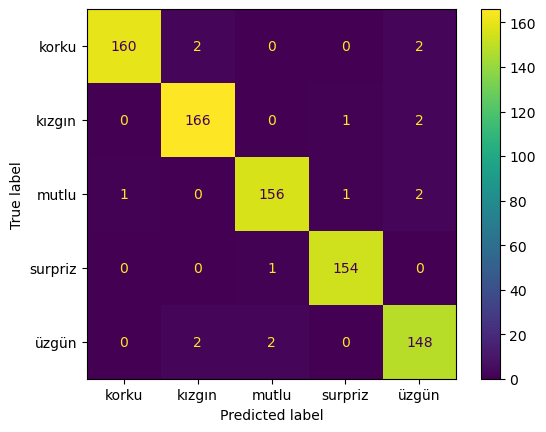

In [17]:
cm= confusion_matrix(label_test,y_pred_class,labels=svm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm.classes_) #renklendirme için
disp.plot()

In [18]:
#örnek veri tipi

msg_test_2=["biraz kötü gibiyim"]
y_pred_class = svm.predict(msg_test_2)
y_pred_class

array(['üzgün'], dtype='<U7')

In [19]:
#df["word2vec"] = df["Text_2"].apply(on_islem.word2vec) #ilk çalıştırıldığında farklı modellerden eğitildikleri için hata oluşur
#df

In [20]:
from gensim.models import Word2Vec #yeni veri setiyle de eğiteceğiz

model = Word2Vec.load("word2vec.model")

model.build_vocab(df["Text_2"].tolist(),update=True)

model.save("word2vec.model")

In [21]:
df["word2vec"] = df["Text_2"].apply(on_islem.word2vec)
df.head()

,Text,Label,Text_2,Text_3,word2vec
0,Allah'ım çıldıracağım. Yemin ederim çıldıracağ...,kızgın,"[allah, çıldıracağım, ye, eder, çıldıracak, si...",allah çıldıracağım ye eder çıldıracak sinirimd...,"[-0.011049945838749409, 0.010776173323392868, ..."
1,site ne zaman çalıştıda ürün stokları bitti di...,kızgın,"[si, zama, çalıştı, ür, stok, bit, diyor, mal,...",si zama çalıştı ür stok bit diyor mal oğl kand...,"[-0.010790437459945679, 0.00661536306142807, 0..."
2,Sebebi neydi ki diye bağıracağım şimdi az kaldı,kızgın,"[sebep, di, bağıracak, kal]",sebep di bağıracak kal,"[-0.01001980621367693, 0.006644558161497116, 0..."
3,Black friday ne amk bu yıl çıkardınız bu bokud...,kızgın,"[black, friday, amk, yıl, çıkar, boku, mal, ne...",black friday amk yıl çıkar boku mal nesiniz,"[-0.006279380992054939, 0.004654079210013151, ..."
4,kısa kısa cevaplar vericeksen niye yazıyorsun ...,kızgın,"[kıs, kıs, cevap, vericek, ni, yazıyor, gerize...",kıs kıs cevap vericek ni yazıyor gerizekal,"[-0.003790761809796095, 0.011498319916427135, ..."


In [22]:
msg_train, msg_test, label_train, label_test = train_test_split(df["word2vec"].tolist(), df["Label"].tolist(),test_size=0.2,random_state=42)
svm = Pipeline([ ('svm', LinearSVC())])
svm.fit(msg_train, label_train)
y_pred_class = svm.predict(msg_test)
print("svm accuracy score: ",accuracy_score(label_test,y_pred_class))
print("svm f1 score: ",f1_score(label_test,y_pred_class,average="weighted"))

svm accuracy score:  0.505
svm f1 score:  0.49800481407904484


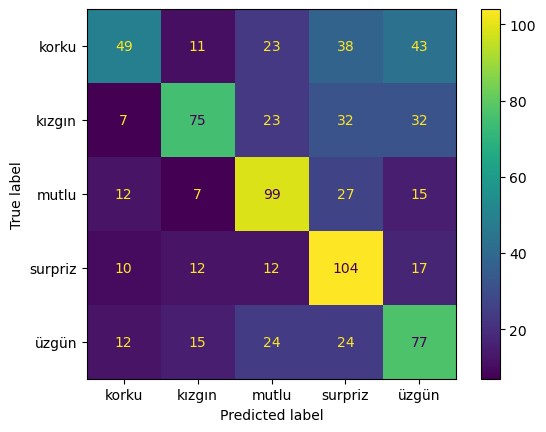

In [23]:
cm= confusion_matrix(label_test,y_pred_class,labels=svm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm.classes_) #renklendirme için
disp.plot()

# KNN ALGORİTMASI

In [24]:
from sklearn.neighbors import KNeighborsClassifier

In [25]:
msg_train, msg_test, label_train, label_test = train_test_split(df["Text_3"].tolist(), df["Label"].tolist(),test_size=0.2,random_state=42)
knn = Pipeline([('vect',TfidfVectorizer()), ('knn', KNeighborsClassifier())])
knn.fit(msg_train, label_train)
y_pred_class = knn.predict(msg_test)
print("knn accuracy score: ",accuracy_score(label_test,y_pred_class))
print("knn f1 score: ",f1_score(label_test,y_pred_class,average="weighted"))

knn accuracy score:  0.79
knn f1 score:  0.7899046399442369


In [26]:
800*0.79 #kaç doğru

632.0

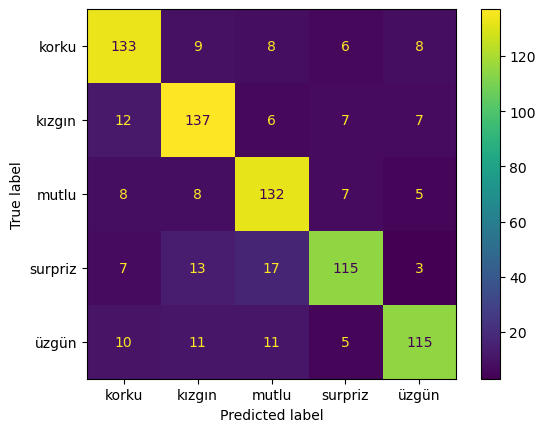

In [27]:
cm= confusion_matrix(label_test,y_pred_class,labels=svm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm.classes_) #renklendirme için
disp.plot()

In [30]:
msg_train, msg_test, label_train, label_test = train_test_split(df["word2vec"].tolist(), df["Label"].tolist(),test_size=0.2,random_state=42)
knn = Pipeline([('knn', KNeighborsClassifier())])
knn.fit(msg_train, label_train)
y_pred_class = knn.predict(msg_test)
print("knn accuracy score: ",accuracy_score(label_test,y_pred_class))
print("knn f1 score: ",f1_score(label_test,y_pred_class,average="weighted"))
#word2vec ile vektörize edilmiş hali

knn accuracy score:  0.3225
knn f1 score:  0.31448497295764294
